## **Distributions**

The distribution provides a parameterized mathematical function that can be used to calculate the probability for any individual observation from the sample space. This distribution describes the grouping or the density of the observations, called the _probability density function_. We can also calculate the likelihood of an observation having a value equal to or lesser than a given value. <br>
A summary of these relationships between observations is called a _cumulative density function_.

### **Discrete Distribution**

A discrete distribution is a distribution of data in statistics that has discrete values. Discrete values are countable, finite, non-negative integers, such as 1, 10, 15. <br>
The most common discrete distributions used by statisticians or analysts include the binomial, Poisson, Bernoulli, and multinomial distributions. Others include the negative binomial, geometric, and hypergeometric distributions.

Suppose a fair coin is tossed twice. Say, the discrete probability distribution has to be determined for the number of heads that are observed. <br>
The steps are as follows:

- Step 1: Determine the sample space of the experiment. When a fair coin is tossed twice the sample space is {HH, HT, TH, TT}. Here, H denotes a head and T represents a tail. Thus, the total number of outcomes is 4.
- Step 2: Define a discrete random variable, X. For the example let X be the number of heads observed.
- Step 3: Identify the possible values that the variable can assume. There are 3 possible values of X. These are 0 (no head is observed), 1 (exactly one head is observed), and 2 (the coin lands on heads twice).
- Step 4: Calculate the probability associated with each outcome. In the given example, the probability can be calculated by the formula, number of favorable outcomes / total number of possible outcomes.
- Step 5: To get the discrete probability distribution represent the probabilities and the corresponding outcomes in tabular form or in graphical form.<br>

This is expressed as follows:<br>

| x | 0 {TT} | 1 {TH, HT} | 2 {HH} |
| --- | --- | --- | --- |
| P(x == x) | 1 / 4 = 0.25 | 2 / 4 = 0.5 | 1 / 4 = 0.25 |

A histogram can be used to represent the discrete probability distribution for this example.

<div align = "center">
<img src = "https://onlinestatbook.com/2/probability/graphics/binomial1.jpg" width = 400/>
</div>

In [1]:
import numpy as np

def discreteDistribution(arr, target = None, plot = False):
    """
    arr: array-like object
    target: the target case to calculate the probability around

    Returns the probabilities of the target around random variable x.
    """
    arr = [str(val) for val in arr]
    prob = {}
    cases = len(arr)

    if target != None:
        target = str(target)
        for i in range(cases):
            temp = str(arr[i].count(target))
            if temp in prob.keys():
                prob[temp] += 1
            else:
                prob[temp] = 1
    else:
        for i in range(cases):
            if arr[i] in prob.keys():
                prob[arr[i]] += 1
            else:
                prob[arr[i]] = 1
    
    for key in prob.keys():
        prob[key] /= cases
    
    prob = sorted(prob.items())

    if plot:
        from matplotlib import pyplot as plt
        plt.bar(np.arange(len(prob)), [val[1] for val in prob])
        plt.xlabel("X")
        plt.ylabel("Probability")
        plt.show()
    
    return prob

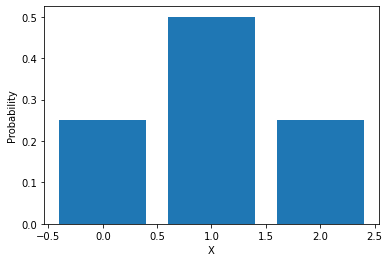

[('0', 0.25), ('1', 0.5), ('2', 0.25)]


In [2]:
print(discreteDistribution(["hh", "tt", "ht", "th"], "t", plot= True))

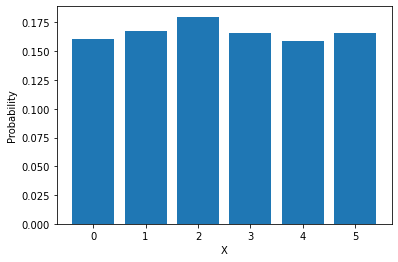

[('1', 0.161),
 ('2', 0.168),
 ('3', 0.18),
 ('4', 0.166),
 ('5', 0.159),
 ('6', 0.166)]

In [3]:
# In this example there is an implied random variable (let’s call it X), 
# which can take the values 1, 2, 3, 4, 5 or 6. A sample of NUM_ROLL size is generated
NUM_ROLLS = 1000

values = [1, 2, 3, 4, 5, 6]
sample = np.random.choice(values, NUM_ROLLS)

discreteDistribution(sample, plot= True)

### **Continuous Distribution**

A continuous distribution describes the probabilities of the possible values of a continuous random variable. A continuous random variable is a random variable with a set of possible values (known as the range) that is infinite and uncountable. <br>
Probabilities of continuous random variables (X) are defined as the area under the curve of its PDF. Thus, only ranges of values can have a nonzero probability. The probability that a continuous random variable equals some value is always zero.

This is a comparison between disrete distribution and continous normal distribution

<div align = "center">
<img src = "https://images.ctfassets.net/vrrt8fsfwf0e/2uRmoVGdJnhi5giTkLkKTd/7ac48a258e46aa6207b2ccc9befcedad/Continuous_distribution_thumbnail.svg" width = 400/>
</div>

In the case of a continuous distribution, the values are present in an infinite range. Thus, in a continuous distribution, the numbers are infinite.

### **Normal Distribution**

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve

- A normal distribution is the proper term for a probability bell curve.
- In a normal distribution the mean is zero and the standard deviation is 1. It has zero skew and a kurtosis of 3.
- Normal distributions are symmetrical, but not all symmetrical distributions are normal.

In [23]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

class normalDistribution:
    def __init__(self, distribution, mean, std):
        self.data = distribution
        self.mean = mean
        self.std = std    
        self.pdf = norm.pdf(distribution, loc = mean, scale = std)
    
    def probability(self, upper_limit, lower_limit = 0, decimals = 5):
        return round(norm(loc = self.mean, scale = self.std).cdf(upper_limit) - norm(loc = self.mean, scale = self.std).cdf(lower_limit), decimals)
    
    def plot(self):
        sb.set_style('whitegrid')
        sb.lineplot(x= self.data, y = self.pdf , color = 'black')
        plt.xlabel('Heights')
        plt.ylabel('Probability Density')
        plt.show()

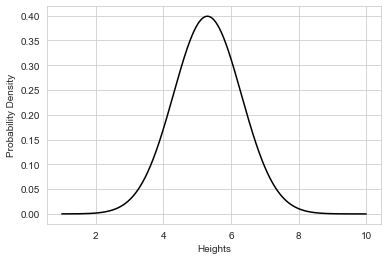

0.21186


In [24]:
data = np.arange(1,10,0.01)

normal = normalDistribution(distribution = data, mean = 5.3, std = 1)
normal.plot()
print(normal.probability(4.5))